In [1]:
!pip install --upgrade keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from keras.constraints import MaxNorm
from keras.layers import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import to_categorical
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.applications  import DenseNet121
from tensorflow.keras import layers

In [15]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,rotation_range = 10, fill_mode='nearest',
    featurewise_center = True,
    featurewise_std_normalization = True,
    vertical_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split = 0.3)

In [16]:
train_generator = train_datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,subset='training'
  )

Found 629 images belonging to 7 classes.


In [17]:
test_generator = train_datagen.flow_from_directory(
     'data',
    target_size = (224, 224),
    batch_size=32,subset = 'validation'
  )

Found 269 images belonging to 7 classes.


Found 898 files belonging to 7 classes.


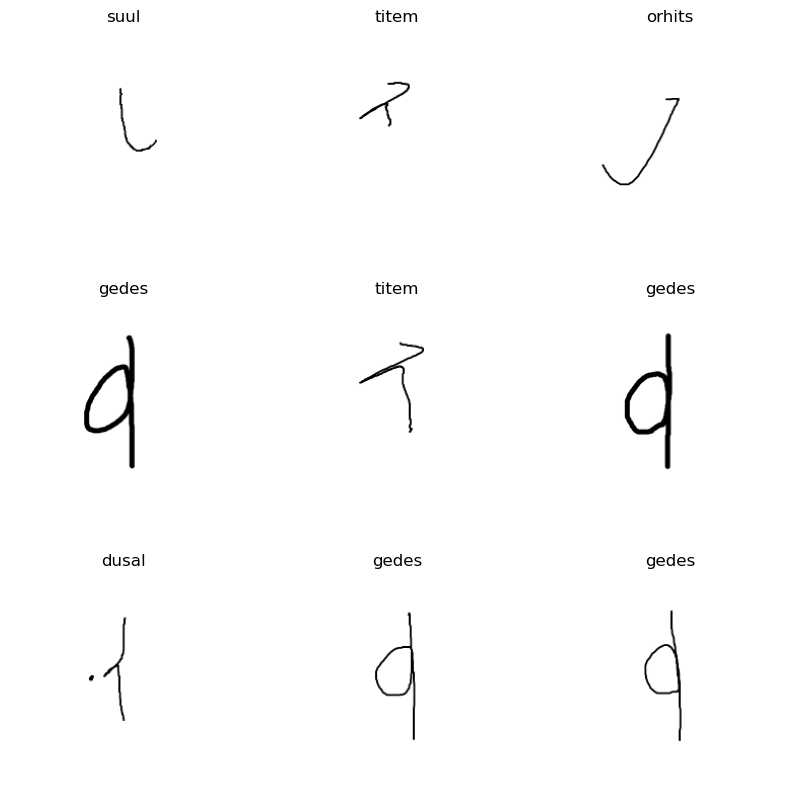

In [18]:
train_dataset = image_dataset_from_directory('data', shuffle=True, batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [38]:
base_model = Xception(weights='imagenet', include_top=True)
for models in base_model.layers:
    models.trainable= False
    
base_model.save('my_xception_model.h5')
loaded_model = tf.keras.models.load_model('my_xception_model.h5')


In [117]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import Xception
# from tensorflow.keras.applications import VGG16

# Create a new Sequential model
custom_model = tf.keras.Sequential()

# Add the Xception base model (non-trainable)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
custom_model.add(base_model)
custom_model.add(GlobalAveragePooling2D())

# Add a Dropout layer
# custom_model.add(Dropout(0.2))

# Add additional layers on top for your specific task
custom_model.add(Dense(1024, activation='relu'))  # Add a fully connected layer
custom_model.add(Dense(7, activation='softmax'))  # Output layer with the number of classes in your task

# Compile the custom model
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now, you can train the custom model with your data
# custom_model.fit(...)


In [118]:
custom_model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss', mode='min')

In [119]:
custom_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_30 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_31 (Dense)            (None, 7)                 7175      
                                                                 
Total params: 22966831 (87.61 MB)
Trainable params: 22912303 (87.40 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [120]:
# output_layer = Dense(4, activation='softmax')  # Replace 'previous_layer' with the actual previous layer of your model.

In [121]:
training_history = custom_model.fit(
            train_generator,
            validation_data = test_generator, 
            callbacks = [early, checkpoint],
            epochs = 10)

Epoch 1/10
20/20 [==============================] - 148s 7s/step - loss: 1.4255 - accuracy: 0.4277 - val_loss: 48.3090 - val_accuracy: 0.3941
Epoch 2/10
20/20 [==============================] - 142s 7s/step - loss: 1.0490 - accuracy: 0.6645 - val_loss: 34.2277 - val_accuracy: 0.4052
Epoch 3/10
20/20 [==============================] - 135s 7s/step - loss: 0.7928 - accuracy: 0.7552 - val_loss: 10.5010 - val_accuracy: 0.5390
Epoch 4/10
20/20 [==============================] - 141s 7s/step - loss: 0.4749 - accuracy: 0.8362 - val_loss: 3.0956 - val_accuracy: 0.7138
Epoch 5/10
20/20 [==============================] - 134s 7s/step - loss: 0.4810 - accuracy: 0.8569 - val_loss: 0.8969 - val_accuracy: 0.7100
Epoch 6/10
20/20 [==============================] - 134s 7s/step - loss: 0.1846 - accuracy: 0.9396 - val_loss: 0.7961 - val_accuracy: 0.7955
Epoch 7/10
20/20 [==============================] - 133s 7s/step - loss: 0.1463 - accuracy: 0.9555 - val_loss: 0.5065 - val_accuracy: 0.8253
Epoch 8/10

In [122]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "iris_classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)


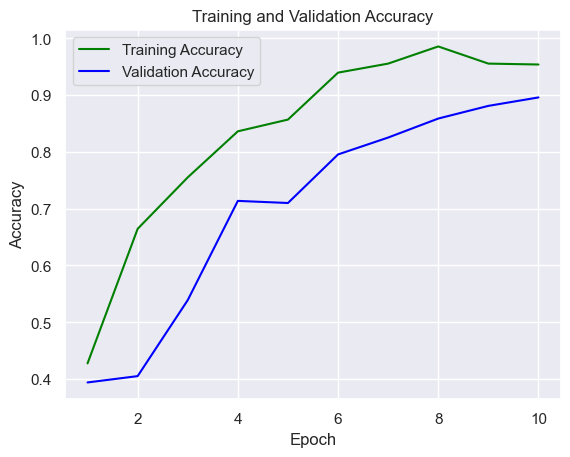

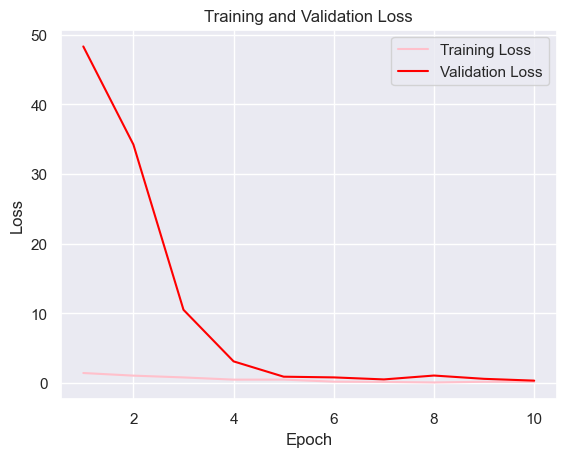

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [124]:
y = model.predict(test_generator)
y = np.argmax(y,axis= 1 )
print(len(y))

9/9 [==============================] - 10s 1s/step
269


In [125]:
from tensorflow.keras.preprocessing import image

# Assuming 'data' is your input image data
data_resized = image.smart_resize(data, (299, 299))

In [126]:
y_true = np.array([])
y_pred = np.array([])
i = 0
for data, labels in test_generator:
    i += 1
    y = np.argmax(model.predict(data_resized), axis=1)
    y_true = np.append(y_true, labels)
    y_pred = np.append(y_pred, y)
    
    if i == test_generator.samples // 32 + 1:
        break

1/1 [==============================] - 2s 2s/step


In [127]:
custom_model.evaluate(test_generator)

9/9 [==============================] - 10s 1s/step - loss: 0.3555 - accuracy: 0.8810


[0.3554929196834564, 0.8810408711433411]

In [128]:
class_names = {}
l = list(test_generator.class_indices.keys())
for i in range(len(l)):
    class_names[i] = l[i]

In [129]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

1/1 [==============================] - 1s 629ms/step
[0]
dusal


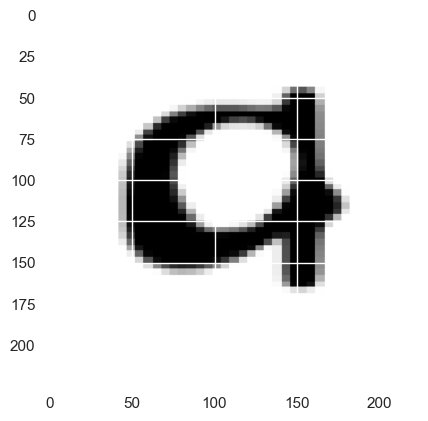

In [130]:
from keras.preprocessing import image
import numpy as np
# image_path = "gartest.png"
# new_img = image.load_img(image_path, target_size=(224, 224))
# img = image.img_to_array(new_img)
# img = np.expand_dims(img, axis=0)
# prediction = model.predict(img)
# prediction = np.argmax(prediction,axis=1)
# print(prediction)
# print(class_names[prediction[0]])
# plt.imshow(new_img)

image_path = "test1.png"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction, axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [131]:
print(len(y_true))
print(len(y_pred))

1883
288


In [132]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
# from sklearn.metrics import LogisticRegression
# from sklearn.metrics import train_test_split
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

y = model.predict(test_generator)
y = np.argmax(y,axis= 1 )
print(len(y))
y_true = test_generator.classes
mat = confusion_matrix(y_true, y)
print(mat)

9/9 [==============================] - 9s 1s/step
269
[[30  0  0  0  0  0  0]
 [90  0  0  0  0  0  0]
 [29  0  0  0  0  0  0]
 [30  0  0  0  0  0  0]
 [30  0  0  0  0  0  0]
 [30  0  0  0  0  0  0]
 [30  0  0  0  0  0  0]]
